# Covid-19 data analysis(statewise)

## Workflow Stages
1. Question or problem definition.
1. Accquire training and testing data.
1. Wrangle, prepare, cleanse the data.
1. Analyze, identify patterns, and explore the data.
1. Model, predict and solve the problem.
1. Visualize, report, and present the problem solving steps and final solution.
1. Supply or submit the results.

### Question or problem defination


#### give the estimation of death statewise with all doses and population 
Estimate the relationship between following 
- deaths with state,dose1,dose2,dose3,precaution
- state with the highest and lowest of  death, 
active, dose1, dose2, dose3 , precaution, population
 

In [ ]:
# data analysis and wranglin
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# machine learning

### Acquire data

In [ ]:
url = "https://raw.githubusercontent.com/ukantjadia/30-days-of-Mahcine-Learning/Main/DAY-11/covid.csv"
covid = pd.read_csv(url)

### Analyze by describing data

In [ ]:
# Which features are available in the dataset?
print(covid.columns.values)

['state' 'confirmed' 'active' 'passive' 'deaths' 'dose1' 'dose2' 'dose3'
 'precaution_dose' 'total_doses' 'population']


Which features are categorical?
- Our data is statewise so has no categorical features.so Categorical: None


Which feature are numerical?
- Continous: confirmed, active, passive, deaths, dose1, dose2, dose3, precaution_dose, total_doses, population

In [ ]:
# preview the data
covid.head()

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
0,Andaman and Nicobar,10742,1,10612,129,313284,320383,236936,53427,991263,426251
1,Andhra Pradesh,2339067,3,2324331,14733,40643161,43549055,11703273,6579565,110556756,52883163
2,Arunachal Pradesh,66890,0,66594,296,860442,747177,72403,58618,1911760,1528296
3,Assam,746100,0,738065,8035,22549957,20561790,2082670,1259853,50284713,34586234
4,Bihar,851379,15,839062,12302,62944633,59144387,11983504,3868082,157197041,119461013


Which features are mixed data types?
- There is no feature of mixed data type.
Which features may contain error or typos?
- State feature may contain error or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [ ]:
covid.tail()

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
31,Telengana,841324,71,837142,4111,29607672,29053708,10525975,2702159,77201709,38472769
32,Tripura,108034,0,107094,940,2658852,2328613,271434,204733,5916312,4057847
33,Uttar Pradesh,2128103,46,2104424,23633,154058287,147716010,35623544,9240735,390639497,228959599
34,Uttarakhand,449379,28,441600,7751,8180312,7940592,1346150,867047,20051714,11090425
35,West Bengal,2118606,58,2097016,21532,67300236,61593452,10257324,5491943,155962840,97694960


Which features contain blank, null or empty values?
- There is no such feature.

What are the data types for various features?
- 10 features are integer
- 1 feature is string(object)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            36 non-null     object
 1   confirmed        36 non-null     int64 
 2   active           36 non-null     int64 
 3   passive          36 non-null     int64 
 4   deaths           36 non-null     int64 
 5   dose1            36 non-null     int64 
 6   dose2            36 non-null     int64 
 7   dose3            36 non-null     int64 
 8   precaution_dose  36 non-null     int64 
 9   total_doses      36 non-null     int64 
 10  population       36 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.2+ KB


#### ***Assumtions based on the data analysis***
following assumptions based on the data analysis done so far.

**Correlating**<br>
- We want to know how well does each feature correlate with Deaths.

**Completing**<br>
1. We may want to complete the dose feature as it is definitely correlated with death.
1. We may want to complete the active feature as it my also correlate with death.
**Correcting**<br>
1. state feature is relatively non-standard, may not contribute directly to deaths, so maybe droped.
**Creating**<br>
1. We may want to create a new feature called real_total_dose based on the dose1, dose2, dose3, precaution_dose to get the total count of all 3 doses.
**Classifying**<br>
We may also add to our assumptions based on the probelm description noted earlier.
1. Population range of state 
1. total_doses
1. active cases in each state

### Analyze by pivoting features

To confirm some of our observations and assumption, we can analyze our feature correlation by pivoting features against each other.

In [ ]:
# relationship between death and state
data = pd.DataFrame()
data['deaths'] = covid.sort_values('deaths',ascending=False).deaths.values[:10]
data['state'] = covid.sort_values('deaths',ascending=False).state.values[:10]

In [ ]:
# relationship between death and population 
population = pd.DataFrame()
population['population'] = covid.sort_values('population',ascending=False).population.values[:10]
population['state'] = covid.sort_values('population',ascending=False).state.values[:10]
# population.head(10)

In [ ]:
cases = pd.DataFrame()
cases['state'] = covid.sort_values(by='confirmed',ascending=False).state.values[:10]
cases['case1'] = covid.sort_values(by='confirmed',ascending=False).confirmed.values[:10]

In [ ]:
dose = pd.DataFrame()
dose['total_dose'] = covid['dose1'] + covid['dose2'] + covid['dose3'] + covid['precaution_dose']
covid[['dose1','dose2','dose3','precaution_dose','total_doses','deaths']].corr()

#### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualization for analyzing the data

In [ ]:
# Top 10 states having the higest population
states,values = population['state'],population['population']
plt.figure(figsize=(14,8))
fig,ax1 = plt.subplots()
title={'fontsize':22,'fontweight':55,'horizontalalignment':'center'}
plt.title("Top States by Population",fontdict=title,pad=260)
ax1.pie(values,labels=states,autopct='%1.1f%%',pctdistance=.7,rotatelabels=40,shadow=True,radius=3,startangle=90)
plt.show()

In [ ]:
# Top 10 states having the confirmed cases
case1,state = cases['case1'],cases['state']
plt.figure(figsize=(14,8))
fig,ax2 = plt.subplots()
title={'fontsize':22,'fontweight':55,'horizontalalignment':'center'}
plt.title("States with Confirmed Cases",fontdict=title,pad=260)
ax2.pie(case1,labels=state,radius=3,autopct='%1.1f%%',pctdistance=.7,rotatelabels=30,startangle=90)
plt.show()

In [ ]:
# Top 10 states having the higest death count
deaths,state=data['deaths'],data['state']
plt.figure(figsize=(14,8))
fig,ax3 = plt.subplots()
title={'fontsize':22,'fontweight':55,'horizontalalignment':'center'}
plt.title("Maximum Deaths by States",fontdict=title,pad=260)
ax3.pie(deaths,labels=state,radius=3,autopct='%1.1f%%',pctdistance=.5,counterclock=True,rotatelabels=30,startangle=90)
plt.show()

In [380]:
# Which states have highest and lowest postivity rate?
covid['Positivity rate'] = covid['confirmed']*100/covid['population']
states_pos_high = covid.sort_values(by='Positivity rate',ascending=False)['state'].values[:5] # 
states_pos_least = covid.sort_values(by='Positivity rate',ascending=True)['state'].values[:5]

high_PR = []
low_PR = []
for i,a in zip(states_pos_high,states_pos_least):
  high_PR.append(covid[covid['state'] == str(i)]['Positivity rate'].values[0])
  low_PR.append(covid[covid['state'] == str(a)]['Positivity rate'].values[0])

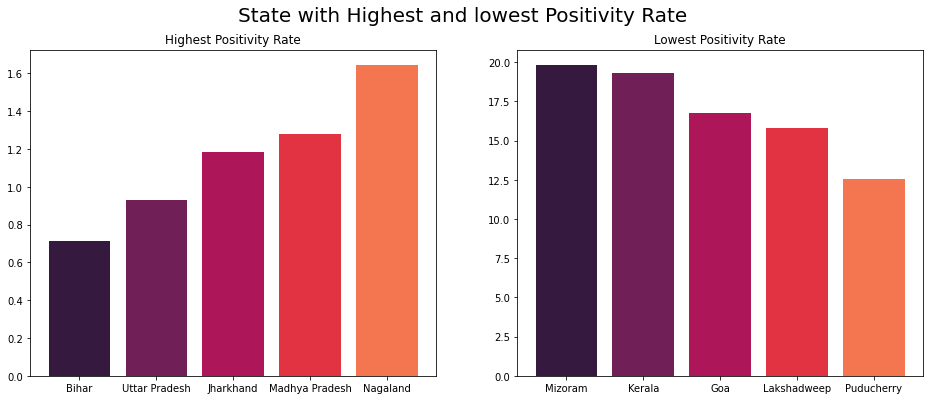

In [381]:
fig,ax4 = plt.subplots(nrows=1,ncols=2,figsize=(16,6))
fig.suptitle("State with Highest and lowest Positivity Rate",fontsize=20)
ax4[0].set_title("Highest Positivity Rate")
ax4[1].set_title("Lowest Positivity Rate")
colr = sns.color_palette('rocket')
ax4[0].bar(states_pos_least,low_PR,color=colr)
ax4[1].bar(states_pos_high,high_PR,color=colr)
plt.show()


In [373]:
fig.suptitle??